In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
df = pd.read_csv('Groceries_dataset.csv')

In [3]:
df

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [4]:
df_sort = df.sort_values(['Member_number','Date']).reset_index(drop=True)

In [5]:
df_sort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [6]:
df_sort

,Member_number,Date,itemDescription
0,1000,15-03-2015,sausage
1,1000,15-03-2015,whole milk
2,1000,15-03-2015,semi-finished bread
3,1000,15-03-2015,yogurt
4,1000,24-06-2014,whole milk
...,...,...,...
38760,5000,10-02-2015,soda
38761,5000,10-02-2015,root vegetables
38762,5000,10-02-2015,semi-finished bread
38763,5000,16-11-2014,bottled beer


In [7]:
ad = []

In [8]:
mem0 = 0
Date0 = ''
li = []
for i in range(len(df_sort)):
    mem1, Date1 = df_sort.iloc[i,:2]
    if [mem0, Date0] != [mem1, Date1]:
        if mem0 != 0:
            ad.append(li)
        mem0, Date0 = mem1, Date1
        li = []
    li.append(df_sort['itemDescription'][i])
    

In [9]:
ad

[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['frozen vegetables', 'other vegetables'],
 ['butter', 'whole milk'],
 ['tropical fruit', 'sugar'],
 ['butter milk', 'specialty chocolate'],
 ['sausage', 'rolls/buns'],
 ['root vegetables', 'detergent'],
 ['frozen meals', 'dental care'],
 ['rolls/buns', 'rolls/buns'],
 ['dish cleaner', 'cling film/bags'],
 ['canned beer', 'frozen fish'],
 ['other vegetables', 'hygiene articles'],
 ['pip fruit', 'whole milk', 'tropical fruit'],
 ['rolls/buns', 'red/blush wine', 'chocolate'],
 ['other vegetables', 'shopping bags'],
 ['whole milk', 'chocolate', 'packaged fruit/vegetables', 'rolls/buns'],
 ['root vegetables', 'whole milk'

In [10]:
te = TransactionEncoder()
te_arr = te.fit(ad).transform(ad)
te_df = pd.DataFrame(te_arr, columns = te.columns_)

In [11]:
te_df

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14957,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14958,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
14959,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14960,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## 연관성 분석

#### 1) 모든 가능한 항목집합의 개수(M)를 줄이는 전략 ▶ Apriori algorithm
#### 2) Transaction 개수(N)을 줄이는 전략 ▶ DHP algorithm
#### 3) 비교하는 수(W)를 줄이는 전략 ▶ FP-growth algorithm

### Apriori

 항목 집합을 생성하고 임계 값 "최소 지원 수"를 초과하는 가장 빈번한 항목 집합을 발견하여 빈번한 패턴을 생성

In [12]:
frequent_itemsets = apriori(te_df, min_support = 0.0003, use_colnames=True)

In [13]:
frequent_itemsets.sort_values('support', ascending = False)

,support,itemsets
160,0.157933,(whole milk)
99,0.122043,(other vegetables)
118,0.110012,(rolls/buns)
134,0.097113,(soda)
161,0.085884,(yogurt)
...,...,...
944,0.000334,"(cling film/bags, curd)"
960,0.000334,"(hygiene articles, coffee)"
973,0.000334,"(red/blush wine, coffee)"
978,0.000334,"(seasonal products, coffee)"


In [14]:
rule_lift = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rule_lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(root vegetables),(Instant food products),0.069576,0.004010,0.000401,0.005764,1.437272,0.000122,1.001764
1,(Instant food products),(root vegetables),0.004010,0.069576,0.000401,0.100000,1.437272,0.000122,1.033804
2,(UHT-milk),(butter milk),0.021388,0.017578,0.000602,0.028125,1.600024,0.000226,1.010852
3,(butter milk),(UHT-milk),0.017578,0.021388,0.000602,0.034221,1.600024,0.000226,1.013288
4,(UHT-milk),(candy),0.021388,0.014370,0.000334,0.015625,1.087355,0.000027,1.001275
...,...,...,...,...,...,...,...,...,...
2697,"(yogurt, rolls/buns)","(sausage, whole milk)",0.007820,0.008956,0.000334,0.042735,4.771655,0.000264,1.035287
2698,(sausage),"(whole milk, yogurt, rolls/buns)",0.060353,0.001337,0.000334,0.005537,4.142303,0.000254,1.004224
2699,(whole milk),"(sausage, yogurt, rolls/buns)",0.157933,0.000602,0.000334,0.002116,3.517656,0.000239,1.001518
2700,(yogurt),"(sausage, whole milk, rolls/buns)",0.085884,0.001136,0.000334,0.003891,3.424582,0.000237,1.002766


In [15]:
rule_conf = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
rule_conf

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(hygiene articles, canned beer)",(whole milk),0.000735,0.157933,0.000401,0.545455,3.453699,0.000285,1.852546
1,"(fruit/vegetable juice, curd)",(sausage),0.000668,0.060353,0.000334,0.500000,8.284607,0.000294,1.879294
2,"(pip fruit, ice cream)",(rolls/buns),0.000668,0.110012,0.000334,0.500000,4.544957,0.000261,1.779976
3,"(other vegetables, whole milk, pastry)",(soda),0.000668,0.097113,0.000334,0.500000,5.148658,0.000269,1.805775
4,"(other vegetables, pastry, soda)",(whole milk),0.000401,0.157933,0.000334,0.833333,5.276485,0.000271,5.052399
5,"(sausage, yogurt, rolls/buns)",(whole milk),0.000602,0.157933,0.000334,0.555556,3.517656,0.000239,1.894650


### FP-Growth

FP-Growth는 FP-Tree라는 구조를 이용하여 Apriori를 효과적으로 구현

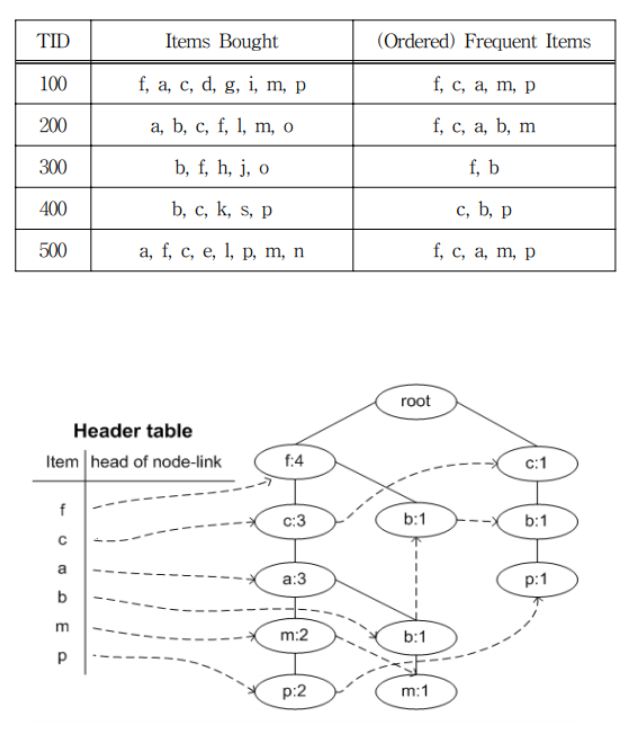

참고자료 : https://2bdbest-ds.tistory.com/entry/Apriori-Algorithm-FP-Growth

In [16]:
from mlxtend.frequent_patterns import fpgrowth

In [17]:
fpgrowth(te_df, min_support=0.05, use_colnames=True).sort_values('support', ascending = False) 

,support,itemsets
0,0.157933,(whole milk)
6,0.122043,(other vegetables)
5,0.110012,(rolls/buns)
4,0.097113,(soda)
1,0.085884,(yogurt)
8,0.069576,(root vegetables)
7,0.067772,(tropical fruit)
9,0.060687,(bottled water)
2,0.060353,(sausage)
10,0.053135,(citrus fruit)
